In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("car data.csv")

In [3]:
df.sample(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
135,Bajaj Pulsar 150,2015,0.65,0.74,5000,Petrol,Individual,Manual,0
225,i10,2011,2.70,4.60,22517,Petrol,Dealer,Manual,0
117,Royal Enfield Thunder 500,2015,1.10,1.90,14000,Petrol,Individual,Manual,0
241,xcent,2015,4.75,7.13,35866,Petrol,Dealer,Manual,1
220,eon,2017,3.50,4.43,38488,Petrol,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
# let's first check na value

df.isna().values.any() # so there is no any value

False

In [6]:
print("Fuel Type: ", df.Fuel_Type.unique())
print("Seller Type: ", df.Seller_Type.unique())
print("Transmission: ", df.Transmission.unique())
print("Owner: ", df.Owner.unique())

Fuel Type:  ['Petrol' 'Diesel' 'CNG']
Seller Type:  ['Dealer' 'Individual']
Transmission:  ['Manual' 'Automatic']
Owner:  [0 1 3]


In [7]:
# year indicates a purchased year of car, it's basically use for calculating how many years old that car

# for that we need to subtract year from current year

from datetime import datetime

df["Current_year"] = datetime.now().year

# now let's subtract Year from Current Year
df["Year"] = df.Current_year - df.Year


In [8]:
# now let's drop current year we don't need it

df.drop(columns="Current_year", axis = 1, inplace = True)

In [9]:
# let's encode text or categorical data using one hot encoding
# let's create  dummy variables for Fuel_Type Seller_Type and Transmission

dummy = pd.get_dummies(df[["Fuel_Type", "Seller_Type", "Transmission"]], drop_first = True)
# drop first columns for preventing dummy variable trape
# for Fuel_Type CNG will be Removed, for Seller Type Dealer will be removed and fo Transmission Automatic remove
df = pd.concat( [df, dummy], axis = 1)
# now we don't need that original text data columns so let's drop it
df.drop(columns = ["Fuel_Type", "Seller_Type", "Transmission"], inplace = True)

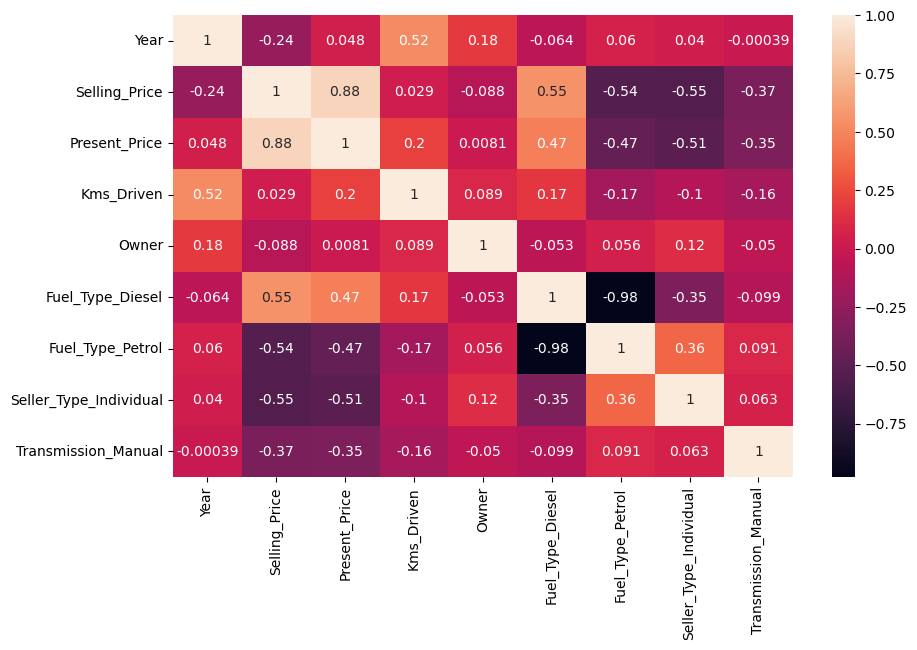

In [10]:
# let's get a corelation of our data

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (10, 6))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [11]:
# let's encode Car_Name text data using one hot encoding

# for this let's convert first Car_Names data into lowercase

df.Car_Name = df.Car_Name.str.lower()

dummy = pd.get_dummies(df.Car_Name, drop_first = True)
# here we dropped first columns which is 800 for prevent dummy variable trap 

df = pd.concat([df, dummy], axis = 1)
# now we don't need Car_Name columns so let's drop it
df.drop("Car_Name", axis = 1, inplace = True)

In [12]:
# now let's create a feature matrix X and target vector y

X = df.drop(columns="Selling_Price")
y = df.Selling_Price

In [13]:
# let's find important feature using ExtraTreesRegressor model 

from sklearn.ensemble import ExtraTreesRegressor

etr = ExtraTreesRegressor()
etr.fit(X, y)
important_features = etr.feature_importances_

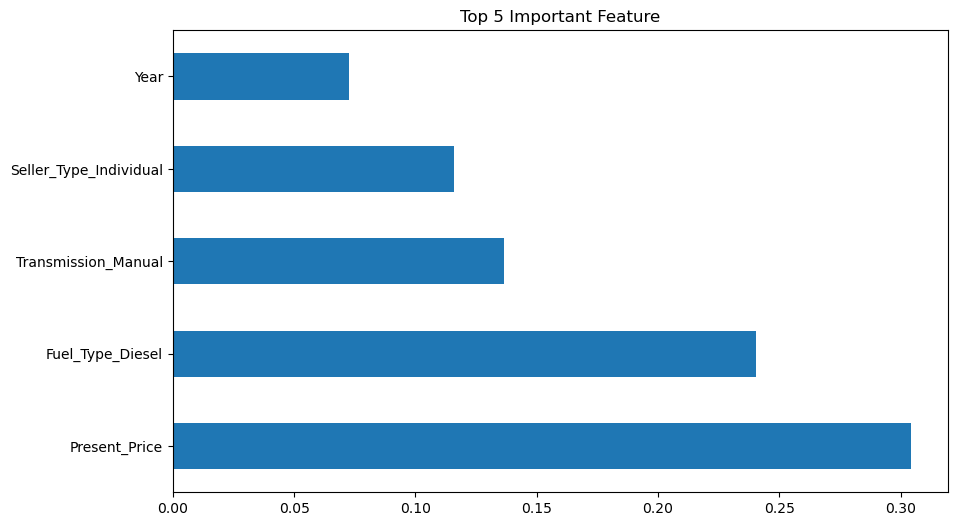

In [14]:
# let's get top important features

important_features = pd.Series(important_features, index = X.columns).sort_values(ascending = False)
# let's plot top 5 important feature

plt.figure(figsize = (10, 6))
important_features[:5].plot(kind = "barh")
plt.title("Top 5 Important Feature")

plt.show()

In [15]:
# let's divide our data into train and test part
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [16]:
# so let's hypertuning parameter and find best algorithm with it's best parameter

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [17]:
# let's create a dict for paramer


algos = {
    "Linear Regression": {
        "model": LinearRegression(),
        "param":{
            "normalize":[True, False]
        }
    },
    "Decision Tree": {
        "model": DecisionTreeRegressor(),
        "param": {
            "criterion": ["mse", "friedman_mse"],
            "splitter": ["best", "random"]
        }
    },
    "Random Forest": {
        "model": RandomForestRegressor(),
        "param": {
            "n_estimators": [int(x) for x in np.linspace(100, 1200, 12)],
            "max_features": ["auto", "sqrt"],
            "max_depth": [int(x) for x in np.linspace(5, 30, 6)],
            "min_samples_split": [2, 5, 10, 15, 100],
            "min_samples_leaf": [1, 2, 5, 10]
        }
    }
}

In [18]:
# let's find best algotithm with it's best parameter
# here we are going to use Randomize Search cv for hyperparamter tuninig

from sklearn.model_selection import RandomizedSearchCV

best_models = {}
scores = []
for model_name, values in algos.items():
    model_tunning = RandomizedSearchCV(values["model"], values["param"], n_iter=10, cv = 5, n_jobs = -1)
    model_tunning.fit(X_train, y_train)
    
    best_models[model_name] = model_tunning
    scores.append({
        "Model": model_name,
        "Best Parameters": model_tunning.best_params_,
        "Best Score": model_tunning.best_score_
    })
    
pd.DataFrame(scores)

C:\Users\veera16\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\veera16\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\veera16\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\veera16\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'm

,Model,Best Parameters,Best Score
0,Linear Regression,{'normalize': False},0.257426
1,Decision Tree,"{'splitter': 'best', 'criterion': 'mse'}",0.871544
2,Random Forest,"{'n_estimators': 1000, 'min_samples_split': 5,...",0.872955


In [19]:
# In above we can see that Decision Tree is best algorithm with 92% accuracy
# but let's test all the algorithm on our test data set

for name, model in best_models.items():
    print(name, " : ", model.score(X_test, y_test))


Linear Regression  :  0.32822428787346924
Decision Tree  :  0.9581914704658985
Random Forest  :  0.9679478004926426


##### so we can see above when we test those trained model using test data we get random forest is best algorithm with 96% accuracy 

In [20]:
# let's take our final model
final_model = best_models["Random Forest"]

In [21]:
# so here we take Random Forest model for our problem

def predict_price(year, present_price, kms, owner, diesel, petrol, individual, manual, vehicle):
    vehicle_index = np.where(X.columns == vehicle.lower())[0][0]
    X_pred = np.zeros_like(X.columns)
    
    feature_list = [year, present_price, kms, owner, diesel, petrol, individual, manual]
    count = 0
    for f in feature_list:
        X_pred[count] = f
        count += 1
    
    if vehicle_index > 0:
        X_pred[vehicle_index] = 1
    
    result = final_model.predict([X_pred])
    
    return result


In [22]:
predict_price(7, 9.54, 43000, 0, 1, 0, 0, 1, "sx4")

C:\Users\veera16\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([6.67645629])

In [23]:
# our model is working perfectly fine with around 96% accuracy
# let's save our model as binary file

import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(final_model, f)

In [24]:
# let's save json file of our columns, it's use in frontend

import json

column_dict = {"data_columns": X.columns.to_list()}

with open("columns.json", "w") as f:
    json.dump(column_dict, f)